<a href="https://colab.research.google.com/github/AjengSyifaa/Tugas-Machine-Learning/blob/main/Tugas5_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tujuan utama dari dataset ini adalah untuk membangun model Machine Learning yang dapat memprediksi apakah suatu pengajuan pinjaman akan disetujui (Loan_Approval = 1) atau ditolak (Loan_Approval = 0) berdasarkan karakteristik pemohon.**

In [156]:
import pandas as pd
import numpy as np

In [157]:
df = pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


# **1. Eksplorasi data**

# Identifikasi Missing Values

In [158]:
print(df.isna().sum())

Age                0
Income             0
Education_Level    0
Credit_Score       0
Loan_Amount        0
Loan_Purpose       0
Loan_Approval      0
dtype: int64


Tidak terdapat missing values pada data.

# Visualisasikan data tersebut

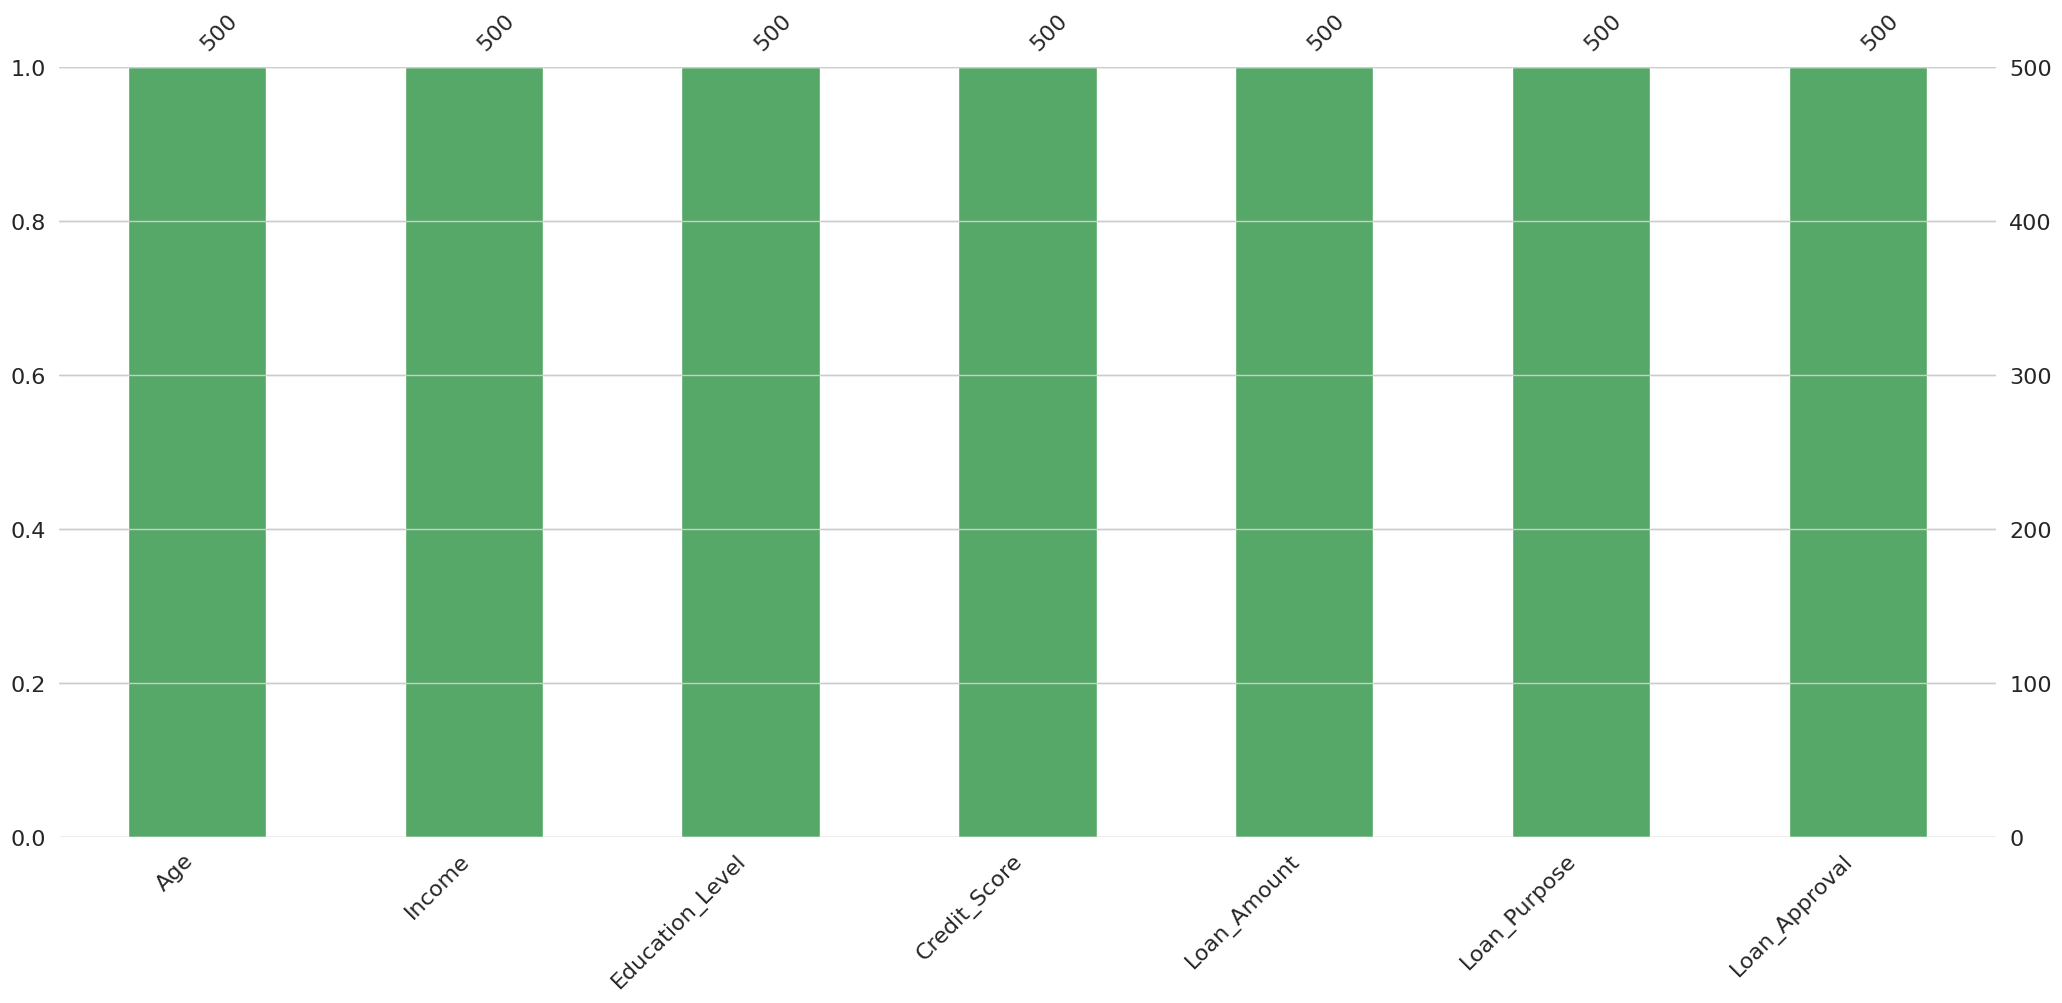

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

sns.set(style="whitegrid")
msno.bar(df, color="g")
plt.show()

# **2. Pemrosesan Data**

In [160]:
print(df.dtypes)

Age                 int64
Income              int64
Education_Level    object
Credit_Score        int64
Loan_Amount         int64
Loan_Purpose       object
Loan_Approval       int64
dtype: object


# Lakukan encoding pada fitur kategorikal

In [161]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Education_Level'] = encoder.fit_transform(df['Education_Level'])
df['Loan_Purpose'] = encoder.fit_transform(df['Loan_Purpose'])
df.head()

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,3,333,26892,4,0
1,46,90588,2,316,26619,2,1
2,32,113610,3,452,1281,4,1
3,60,117856,1,677,28420,4,0
4,25,58304,3,641,16360,0,0


# Lakukan feature scaling pada fitur numerik

In [162]:
#uji normalitas
from scipy.stats import shapiro

stat, p = shapiro(df)
print(f"Shapiro-Wilk Test: Statistik={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("Data berdistribusi normal (Gagal tolak H0)")
else:
    print("Data tidak berdistribusi normal (Tolak H0)")

Shapiro-Wilk Test: Statistik=0.5788, p-value=0.0000
Data tidak berdistribusi normal (Tolak H0)


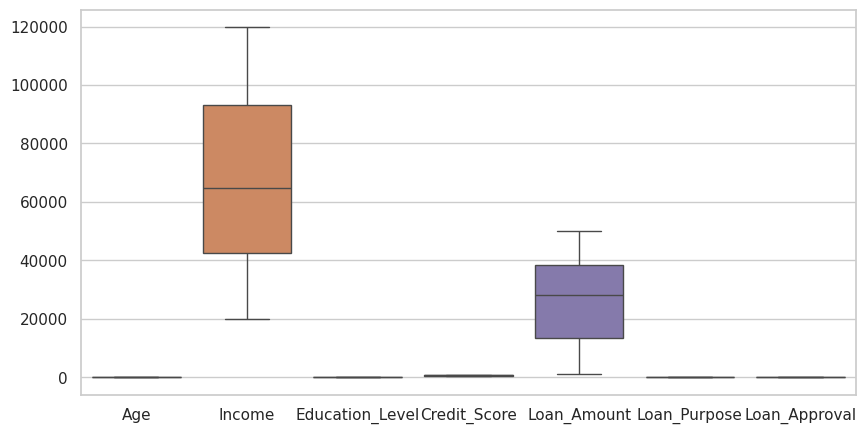

In [163]:
# uji outlier
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

Data memiliki outlier dan tidak berdistribusi normal, maka scaling menggunakan RobustScaler.

In [164]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled3_df = scaler.fit_transform(df[['Age', 'Income', 'Credit_Score', 'Loan_Amount']])
scaled3_df = pd.DataFrame(scaled3_df, columns=['Age', 'Income', 'Credit_Score', 'Loan_Amount'])
scaled3_df.head()

,Age,Income,Credit_Score,Loan_Amount
0,0.636364,-0.809437,-0.941839,-0.043647
1,0.181818,0.508172,-1.005629,-0.054543
2,-0.454545,0.963720,-0.495310,-1.065899
3,0.818182,1.047737,0.348968,0.017343
4,-0.772727,-0.130647,0.213884,-0.464027


In [165]:
scaled3_df.shape

(500, 4)

# Bagi dataset menjadi training set (80%) dan testing set (20%)

In [166]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Approval', axis=1)
y = df['Loan_Approval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 42, stratify=y )
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 400
Jumlah data testing: 100


In [167]:
X_train.shape, X_test.shape

((400, 6), (100, 6))

In [168]:
y_train.value_counts(normalize=True)

,proportion
Loan_Approval,
1,0.595
0,0.405


In [169]:
y_test.value_counts(normalize=True)

,proportion
Loan_Approval,
1,0.6
0,0.4


# **3. Pemilihan dan Training Model**

# Pilih minimal dua algoritma Machine Learning yang berbeda. Jelaskan alasan pemilihan tersebut

Algoritma yang akan digunakan adalah K-Nearest Neighbors (KNN), Logistic Regression, dan Support Vector Machine (SVM). Karena data memiliki outlier, sehingga algoritma yang digunakan harus sensitif terhadap skala fitur dan dapat bekerja dengan baik meskipun ada data outlier.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Lakukan training model menggunakan dataset yang telah diproses

In [171]:
# K-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.52


In [172]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.6


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
# Support Vector Machine (SVM)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.6


# **4. Evaluasi Model**

# Hitung dan bandingkan metric evaluasi dari kedua model yang dipilih

In [174]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [175]:
metrics = {
    "Model": ["Logistic Regression", "Support Vector Machine"],
    "Accuracy": [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_log)],
    "Precision": [precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_log)],
    "Recall": [recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_log)],
    "F1 Score": [f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_log)],
    "ROC-AUC": [roc_auc_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_log)],
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                    Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0     Logistic Regression       0.6        0.6     1.0      0.75      0.5
1  Support Vector Machine       0.6        0.6     1.0      0.75      0.5


Kedua model memiliki nilai Accuracy, Precision, Recall, F1-Score, dan ROC-AUC yang sama. oleh karena itu dilakukan PCA untuk mengetahui apakah kernel linear atau no-linear. Jika titik-titik membentuk pola melingkar atau tidak dapat dipisahkan dengan garis lurus, maka kernel non-linear dan model yang akan digunakan adalah Logistic Regression. Sedangkan, jika titik-titik dalam scatter plot dapat dipisahkan dengan garis lurus, maka kernel linear dan model yang akan digunakan adalah SVM.

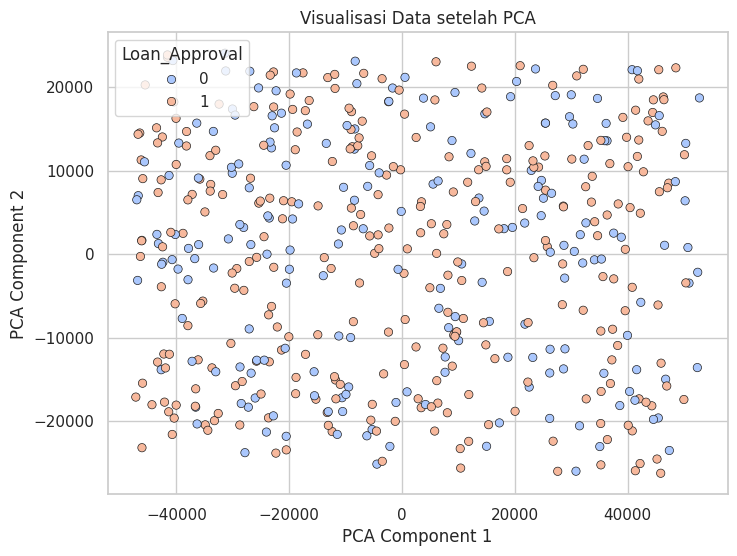

In [176]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Data setelah PCA")
plt.show()

# Pilih model dengan performa terbaik untuk tahap tuning
Model yang dipilih adalah Logistic Regression, karena kernel non-linear. hal ini ditunjukkan pada titik-titik yang membentuk pola melingkar atau tidak dapat dipisahkan dengan garis lurus.

# **5. Tuning Model dengan Grid Search atau Random Search**

# Gunakan Grid Search atau Random Search untuk mencari kombinasi hyperparameter terbaik

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [178]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Tentukan hyperparameter yang akan diuji
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Model Logistic Regression
log_model = LogisticRegression(max_iter=5000)

# Random Search dengan 20 iterasi
random_search = RandomizedSearchCV(log_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

# Tampilkan kombinasi hyperparameter terbaik yang diperoleh

In [179]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.001}
Best Accuracy: 0.595


# **6. Perbandingan Performa Sebelum dan Sesudah Tuning**

# Bandingkan hasil evaluasi model sebelum dan sesudah tuning

In [180]:
from sklearn.metrics import accuracy_score, classification_report

# Gunakan Model Terbaik
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluasi Model Sebelum Tuning
print("\nEvaluasi Model Sebelum Tuning:")
print("Accuracy:", (metrics_df))

# Evaluasi Model Setelah Tuning
print("\nEvaluasi Model Setelah Tuning:")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

# 3. Bandingkan Hasil
print("\nPerbandingan Accuracy:")
print(f"- Sebelum Tuning: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"- Setelah Tuning: {accuracy_score(y_test, y_pred_tuned):.4f}")

print("\nHyperparameter Terbaik:", random_search.best_params_)


Evaluasi Model Sebelum Tuning:
Accuracy:                     Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0     Logistic Regression       0.6        0.6     1.0      0.75      0.5
1  Support Vector Machine       0.6        0.6     1.0      0.75      0.5

Evaluasi Model Setelah Tuning:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      1.00      0.75        60

    accuracy                           0.60       100
   macro avg       0.30      0.50      0.38       100
weighted avg       0.36      0.60      0.45       100

Accuracy: 0.6

Perbandingan Accuracy:
- Sebelum Tuning: 0.6000
- Setelah Tuning: 0.6000

Hyperparameter Terbaik: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.001}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Jelaskan apakah tuning berhasil meningkatkan performa model

Ya, pada kasus ini tuning tidak berhasil meningkatkan performa model yang sebelumnya.